In [2]:
# STEP 1: Importing Necessary Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

# Optional: Enhancing visual aesthetics
plt.style.use("ggplot")
sns.set_palette("Set2")
warnings.filterwarnings("ignore")

# STEP 2: Load the Dataset
file_path = "D:/ML PROJECTS/Bike Sharing Demand Prediction/SeoulBikeData.csv"
df = pd.read_csv(file_path, encoding='latin1')

# STEP 3: Display basic info
print("✅ Dataset Shape:", df.shape)
print("\n✅ Dataset Columns:\n", df.columns)
print("\n✅ Sample Records:\n", df.head())


✅ Dataset Shape: (8760, 14)

✅ Dataset Columns:
 Index(['Date', 'Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Seasons',
       'Holiday', 'Functioning Day'],
      dtype='object')

✅ Sample Records:
          Date  Rented Bike Count  Hour  Temperature(°C)  Humidity(%)  \
0  01/12/2017                254     0             -5.2           37   
1  01/12/2017                204     1             -5.5           38   
2  01/12/2017                173     2             -6.0           39   
3  01/12/2017                107     3             -6.2           40   
4  01/12/2017                 78     4             -6.0           36   

   Wind speed (m/s)  Visibility (10m)  Dew point temperature(°C)  \
0               2.2              2000                      -17.6   
1               0.8              2000                      -17.6   
2 

In [3]:
# STEP 2.1: Parse 'Date' into datetime and extract useful features
df['Date'] = pd.to_datetime(df['Date'], format='%d/%m/%Y')
df['Day'] = df['Date'].dt.day
df['Month'] = df['Date'].dt.month
df['Year'] = df['Date'].dt.year
df['Weekday'] = df['Date'].dt.weekday  # 0 = Monday

# STEP 2.2: Drop original 'Date' column
df.drop(columns=['Date'], inplace=True)

# STEP 2.3: Check for missing values
print("✅ Missing Values:\n", df.isnull().sum())

# STEP 2.4: Encode categorical features
df['Holiday'] = df['Holiday'].map({'No Holiday': 0, 'Holiday': 1})
df['Functioning Day'] = df['Functioning Day'].map({'Yes': 1, 'No': 0})
df = pd.get_dummies(df, columns=['Seasons'], drop_first=True)

# STEP 2.5: Print final shape and data types
print("\n✅ Final Feature Set Shape:", df.shape)
print("\n✅ Final Column Types:\n", df.dtypes)


✅ Missing Values:
 Rented Bike Count            0
Hour                         0
Temperature(°C)              0
Humidity(%)                  0
Wind speed (m/s)             0
Visibility (10m)             0
Dew point temperature(°C)    0
Solar Radiation (MJ/m2)      0
Rainfall(mm)                 0
Snowfall (cm)                0
Seasons                      0
Holiday                      0
Functioning Day              0
Day                          0
Month                        0
Year                         0
Weekday                      0
dtype: int64

✅ Final Feature Set Shape: (8760, 19)

✅ Final Column Types:
 Rented Bike Count              int64
Hour                           int64
Temperature(°C)              float64
Humidity(%)                    int64
Wind speed (m/s)             float64
Visibility (10m)               int64
Dew point temperature(°C)    float64
Solar Radiation (MJ/m2)      float64
Rainfall(mm)                 float64
Snowfall (cm)                float64
Holiday 

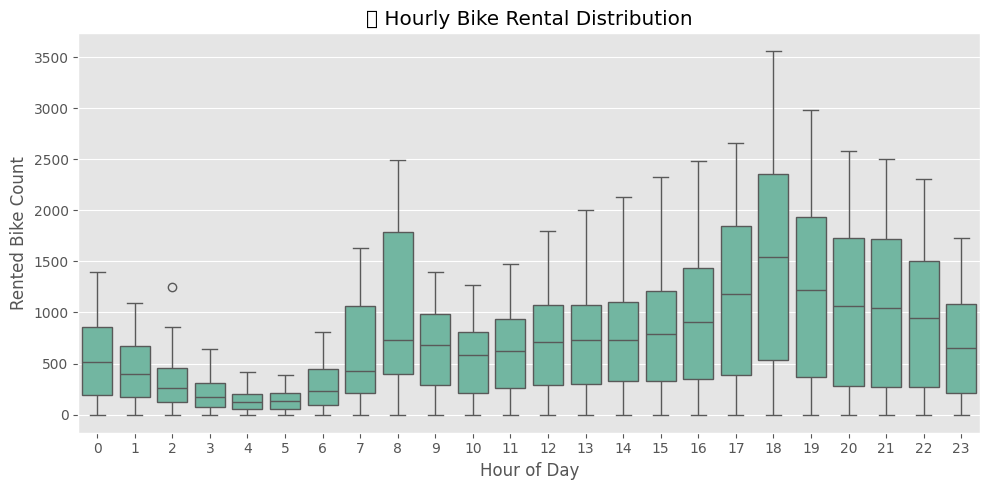

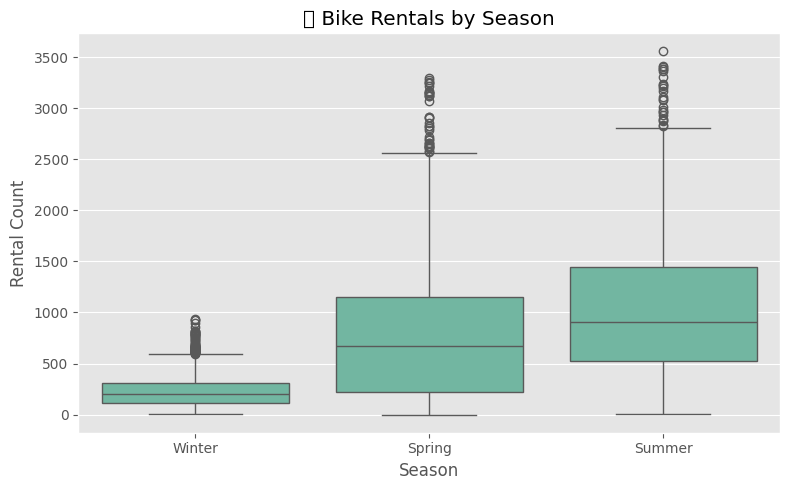

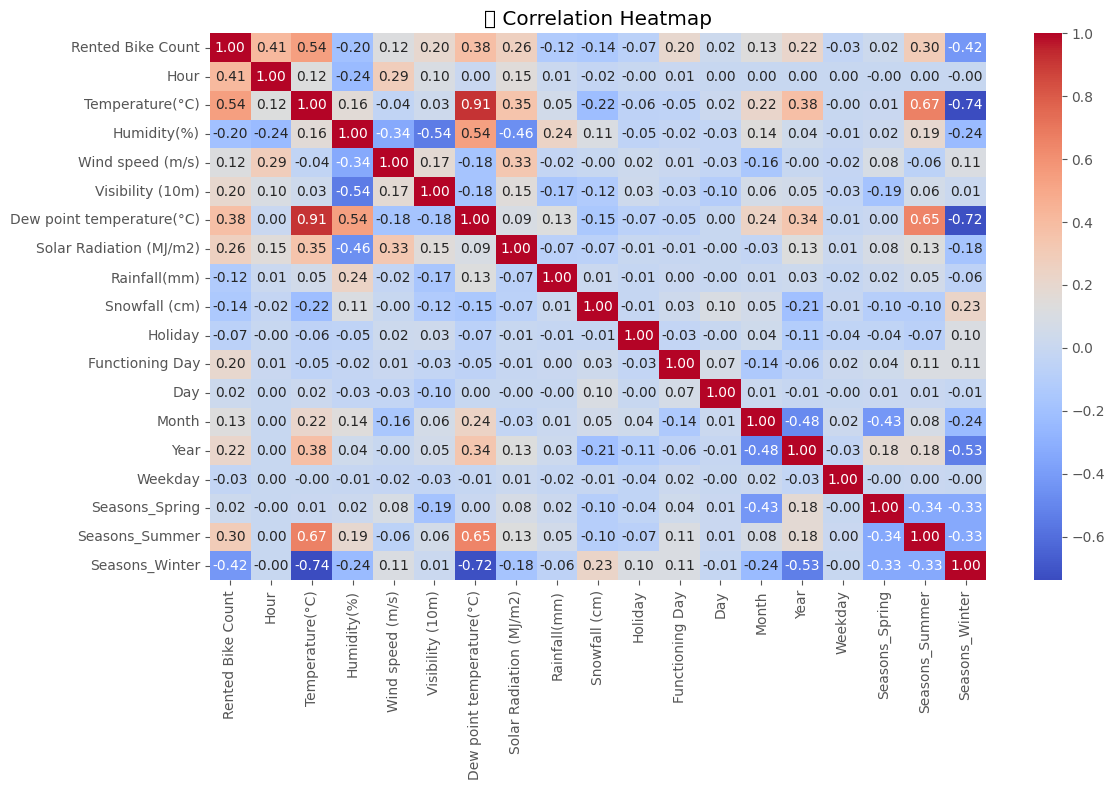

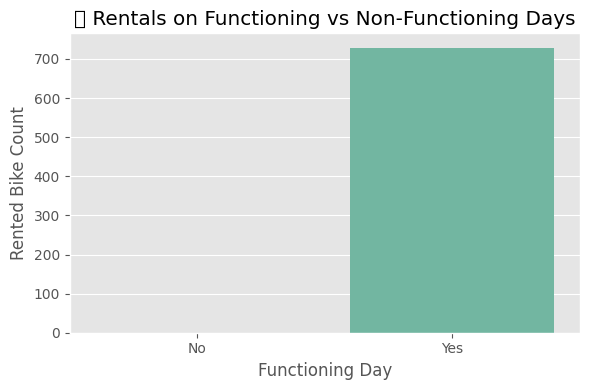

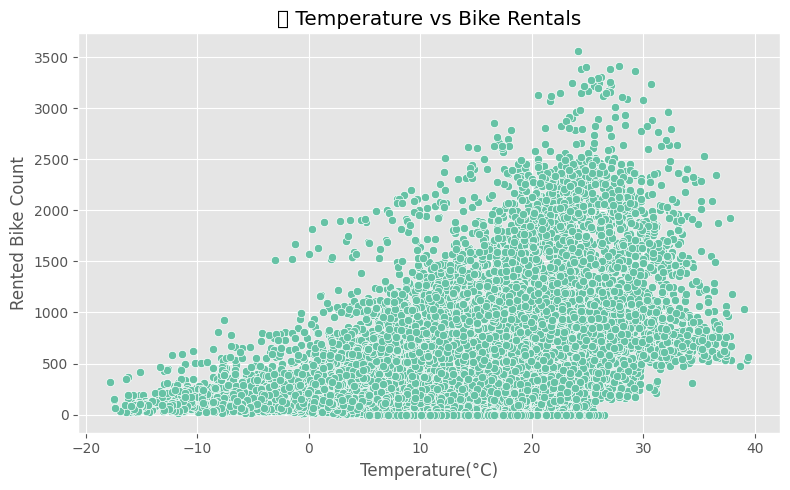

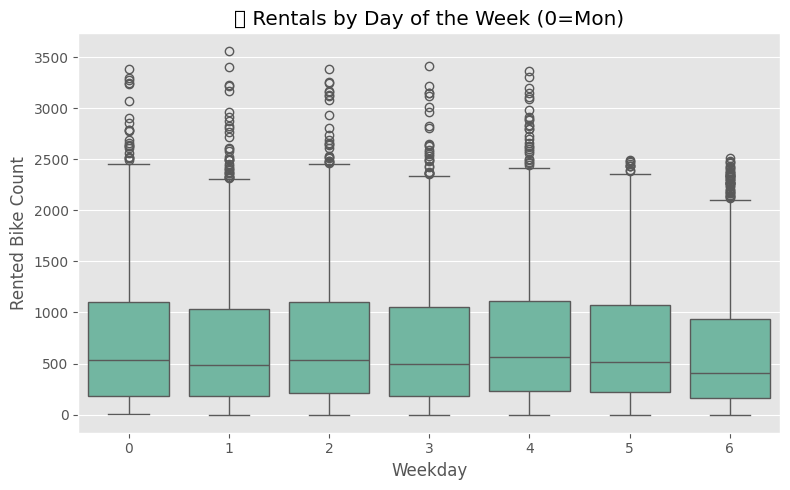

In [4]:
# Import libraries if not already imported
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use("ggplot")
sns.set_palette("Set2")

# --- 1. Hourly Demand Distribution ---
plt.figure(figsize=(10, 5))
sns.boxplot(x='Hour', y='Rented Bike Count', data=df)
plt.title("📦 Hourly Bike Rental Distribution")
plt.xlabel("Hour of Day")
plt.ylabel("Rented Bike Count")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

# --- 2. Rentals by Season ---
plt.figure(figsize=(8, 5))
season_cols = [col for col in df.columns if 'Seasons_' in col]
df_season = df.copy()
df_season['Season'] = df[season_cols].idxmax(axis=1).str.replace('Seasons_', '')
sns.boxplot(x='Season', y='Rented Bike Count', data=df_season)
plt.title("🌦️ Bike Rentals by Season")
plt.xlabel("Season")
plt.ylabel("Rental Count")
plt.tight_layout()
plt.show()

# --- 3. Correlation Heatmap ---
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title("📈 Correlation Heatmap")
plt.tight_layout()
plt.show()

# --- 4. Rentals by Functioning Day ---
plt.figure(figsize=(6, 4))
sns.barplot(x='Functioning Day', y='Rented Bike Count', data=df, ci=None)
plt.title("🚦 Rentals on Functioning vs Non-Functioning Days")
plt.xticks([0, 1], ["No", "Yes"])
plt.tight_layout()
plt.show()

# --- 5. Temperature vs Rented Bike Count ---
plt.figure(figsize=(8, 5))
sns.scatterplot(x='Temperature(°C)', y='Rented Bike Count', data=df)
plt.title("🌡️ Temperature vs Bike Rentals")
plt.tight_layout()
plt.show()

# --- 6. Rentals by Weekday ---
plt.figure(figsize=(8, 5))
sns.boxplot(x='Weekday', y='Rented Bike Count', data=df)
plt.title("📅 Rentals by Day of the Week (0=Mon)")
plt.tight_layout()
plt.show()


In [5]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import joblib
import numpy as np

# STEP 4.1: Define features and label
X = df.drop(columns=['Rented Bike Count'])
y = df['Rented Bike Count']

# STEP 4.2: Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# STEP 4.3: Initialize and train the model
model = RandomForestRegressor(n_estimators=150, random_state=42)
model.fit(X_train, y_train)

# STEP 4.4: Predict and evaluate
y_pred = model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"✅ MAE: {mae:.2f}")
print(f"✅ RMSE: {rmse:.2f}")
print(f"✅ R² Score: {r2:.2f}")

# STEP 4.5: Save model and feature columns
joblib.dump(model, "D:/ML PROJECTS/Bike Sharing Demand Prediction/bike_demand_model.pkl")
joblib.dump(list(X.columns), "D:/ML PROJECTS/Bike Sharing Demand Prediction/feature_columns.pkl")

print("✅ Model and feature columns saved successfully.")


✅ MAE: 97.76
✅ RMSE: 172.45
✅ R² Score: 0.93
✅ Model and feature columns saved successfully.


In [7]:
import pandas as pd
import numpy as np
import pickle
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Load dataset
df = pd.read_csv("D:/ML PROJECTS/Bike Sharing Demand Prediction/SeoulBikeData.csv", encoding='unicode_escape')

# Rename target column
df.rename(columns={"Rented Bike Count": "Target"}, inplace=True)

# Drop unnecessary columns
df.drop(columns=["Date", "Hour", "Functioning Day", "Holiday"], inplace=True)

# Encode categorical cols
df = df.dropna()
for col in df.select_dtypes("object").columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])

# Features and target
X = df.drop("Target", axis=1)
y = df["Target"]

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Save column names
with open("D:/ML PROJECTS/Bike Sharing Demand Prediction/feature_columns.pkl", "wb") as f:
    pickle.dump(X.columns.tolist(), f)

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Build model
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(32, activation='relu'),
    Dense(1)
])
model.compile(optimizer='adam', loss='mse', metrics=['mae'])

# Train
model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_test, y_test))

# Save the model
model.save("D:/ML PROJECTS/Bike Sharing Demand Prediction/bike_demand_model.h5")


Epoch 1/20
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 895452.0625 - mae: 698.9999 - val_loss: 666816.8750 - val_mae: 576.3772
Epoch 2/20
219/219 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 526727.6250 - mae: 497.7796 - val_loss: 282816.4062 - val_mae: 366.7173
Epoch 3/20
219/219 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 282096.5312 - mae: 370.4055 - val_loss: 255271.9375 - val_mae: 351.7972
Epoch 4/20
219/219 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 252870.8594 - mae: 358.4323 - val_loss: 243539.7500 - val_mae: 345.9518
Epoch 5/20
219/219 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 247360.3906 - mae: 349.1440 - val_loss: 237503.7969 - val_mae: 340.9405
Epoch 6/20
219/219 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 229857.7500 - mae: 337.0283 - val_loss: 234227.2500 - val_mae: 337.8715
Epoch 7/20
219/219 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 248010.3594 - mae: 346.9774 - val_loss: 232334.5000 - val_mae: 335.4576
Epoch 8/20
219/219 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 234365.9375 - ma

In [8]:
import joblib

# After training your sklearn model
joblib.dump(model, 'bike_demand_model.joblib')


['bike_demand_model.joblib']

In [9]:
joblib.dump(feature_columns, 'feature_columns.joblib')


['feature_columns.joblib']